In [19]:
#import dict.
import pandas as pd
import os
import matplotlib.pyplot as plt

In [20]:
#path of datset
data_path = "/kaggle/input/hourly-weather-surface-brazil-southeast-region/southeast.csv"

In [21]:
#path of clean(output) file
output_file = 'southeast_clean.csv'


In [22]:
#create chunk (for large datset)
chunks = pd.read_csv(
    data_path,
    chunksize=100000
)

In [23]:
#rename columns name
rename_cols = {
    'index': 'index',
    'data': 'date',
    'hora': 'hour',
    'precipitação_total_horário_(mm)': 'precip_mm',
    'pressao_atmosferica_ao_nivel_da_estacao_horaria_(mb)': 'pressure_station_mb',
    'pressão_atmosferica_max.na_hora_ant._(aut)_(mb)': 'pressure_max_prev_mb',
    'pressão_atmosferica_min._na_hora_ant._(aut)_(mb)': 'pressure_min_prev_mb',
    'radiacao_global_(kj/m²)': 'solar_radiation_kj',
    'temperatura_do_ar_-_bulbo_seco_horaria_(°c)': 'temp_air_c',
    'temperatura_do_ponto_de_orvalho_(°c)': 'dew_point_c',
    'temperatura_máxima_na_hora_ant._(aut)_(°c)': 'temp_max_prev_c',
    'temperatura_mínima_na_hora_ant._(aut)_(°c)': 'temp_min_prev_c',
    'temperatura_orvalho_max._na_hora_ant._(aut)_(°c)': 'dew_point_max_prev_c',
    'temperatura_orvalho_min._na_hora_ant._(aut)_(°c)': 'dew_point_min_prev_c',
    'umidade_rel._max._na_hora_ant._(aut)_(%)': 'humidity_max_prev_pct',
    'umidade_rel._min._na_hora_ant._(aut)_(%)': 'humidity_min_prev_pct',
    'umidade_relativa_do_ar_horaria_(%)': 'humidity_pct',
    'vento_direção_horaria_(gr)_(°_(gr))': 'wind_dir_deg',
    'vento_rajada_maxima_(m/s)': 'wind_gust_ms',
    'vento_velocidade_horaria_(m/s)': 'wind_speed_ms',
    'region': 'region',
    'state': 'state',
    'station': 'station',
    'station_code': 'station_code',
    'latitude': 'latitude',
    'longitude': 'longitude',
    'height': 'height'
}


In [24]:
#cleaning dataset

for chunk in chunks:

    #column clean
    chunk.columns = (
        chunk.columns
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(",", "")
    )

    #date format
    chunk['data'] = pd.to_datetime(chunk['data'], errors='coerce')

    #hour format
    chunk['hora'] = (
        chunk['hora']
        .astype(str)
        .str.slice(0, 2)
        .astype(float)
    )

In [25]:
 #datetime column for EDA
 chunk['datetime'] = (
        chunk['data'] +
        pd.to_timedelta(chunk['hora'], unit='h')
    )

In [26]:
#rename columns
chunk.rename(columns=rename_cols, inplace=True)


In [27]:
#save output file
chunk.to_csv(
        output_file,
        mode='a',
        index=False,
        header=not os.path.exists(output_file)
    )

In [28]:
#load file
df = pd.read_csv(
    'southeast_clean.csv',
    parse_dates=['datetime'],
    low_memory=False
)


In [29]:
df.shape

(90432, 28)

In [30]:
#column name
df.columns

Index(['index', 'date', 'hour', 'precip_mm', 'pressure_station_mb',
       'pressure_max_prev_mb', 'pressure_min_prev_mb', 'solar_radiation_kj',
       'temp_air_c', 'dew_point_c', 'temp_max_prev_c', 'temp_min_prev_c',
       'dew_point_max_prev_c', 'dew_point_min_prev_c', 'humidity_max_prev_pct',
       'humidity_min_prev_pct', 'humidity_pct', 'wind_dir_deg', 'wind_gust_ms',
       'wind_speed_ms', 'region', 'state', 'station', 'station_code',
       'latitude', 'longitude', 'height', 'datetime'],
      dtype='object')

In [31]:
#head of dataset
df.head()

,index,date,hour,precip_mm,pressure_station_mb,pressure_max_prev_mb,pressure_min_prev_mb,solar_radiation_kj,temp_air_c,dew_point_c,...,wind_gust_ms,wind_speed_ms,region,state,station,station_code,latitude,longitude,height,datetime
0,329958,2021-03-10,6.0,0.0,871.2,871.5,871.2,-9999,13.3,12.9,...,0.0,0.0,SE,MG,MARIA DA FE,A531,-22.314567,-45.373049,1281.43,2021-03-10 06:00:00
1,329959,2021-03-10,7.0,0.0,871.5,871.5,871.1,-9999,13.7,13.3,...,0.0,0.0,SE,MG,MARIA DA FE,A531,-22.314567,-45.373049,1281.43,2021-03-10 07:00:00
2,329960,2021-03-10,8.0,0.0,871.9,871.9,871.4,-9999,14.3,14.0,...,0.0,0.0,SE,MG,MARIA DA FE,A531,-22.314567,-45.373049,1281.43,2021-03-10 08:00:00
3,329961,2021-03-10,9.0,0.0,872.0,872.1,871.9,-9999,14.1,13.8,...,0.0,0.0,SE,MG,MARIA DA FE,A531,-22.314567,-45.373049,1281.43,2021-03-10 09:00:00
4,329962,2021-03-10,10.0,0.0,872.1,872.1,872.0,-9999,18.2,17.7,...,0.0,0.0,SE,MG,MARIA DA FE,A531,-22.314567,-45.373049,1281.43,2021-03-10 10:00:00


In [32]:
#datatype 
df.dtypes


index                             int64
date                             object
hour                            float64
precip_mm                       float64
pressure_station_mb             float64
pressure_max_prev_mb            float64
pressure_min_prev_mb            float64
solar_radiation_kj                int64
temp_air_c                      float64
dew_point_c                     float64
temp_max_prev_c                 float64
temp_min_prev_c                 float64
dew_point_max_prev_c            float64
dew_point_min_prev_c            float64
humidity_max_prev_pct             int64
humidity_min_prev_pct             int64
humidity_pct                      int64
wind_dir_deg                      int64
wind_gust_ms                    float64
wind_speed_ms                   float64
region                           object
state                            object
station                          object
station_code                     object
latitude                        float64


In [33]:
#find missing value
df.isna().sum().sort_values(ascending=False)


index                    0
date                     0
hour                     0
precip_mm                0
pressure_station_mb      0
pressure_max_prev_mb     0
pressure_min_prev_mb     0
solar_radiation_kj       0
temp_air_c               0
dew_point_c              0
temp_max_prev_c          0
temp_min_prev_c          0
dew_point_max_prev_c     0
dew_point_min_prev_c     0
humidity_max_prev_pct    0
humidity_min_prev_pct    0
humidity_pct             0
wind_dir_deg             0
wind_gust_ms             0
wind_speed_ms            0
region                   0
state                    0
station                  0
station_code             0
latitude                 0
longitude                0
height                   0
datetime                 0
dtype: int64

In [34]:
df.describe()


,index,hour,precip_mm,pressure_station_mb,pressure_max_prev_mb,pressure_min_prev_mb,solar_radiation_kj,temp_air_c,dew_point_c,temp_max_prev_c,...,humidity_max_prev_pct,humidity_min_prev_pct,humidity_pct,wind_dir_deg,wind_gust_ms,wind_speed_ms,latitude,longitude,height,datetime
count,90432.000000,90432.000000,90432.000000,90432.000000,90432.000000,90432.000000,90432.000000,90432.000000,90432.000000,90432.000000,...,90432.000000,90432.000000,90432.000000,90432.000000,90432.000000,90432.000000,90432.000000,90432.000000,90432.000000,90432
mean,352565.500000,11.500000,-3287.998301,-2147.519504,-2158.679459,-2159.038845,-5255.466870,-2801.134099,-3063.148259,-2811.459253,...,-3042.571722,-3047.442609,-3024.723593,-2738.885771,-2876.286487,-2855.799547,-20.138507,-45.898750,666.461811,2021-03-02 03:58:16.815287296
min,329958.000000,0.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-24.533056,-50.974710,22.000000,2021-01-01 00:00:00
25%,341261.750000,5.750000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-22.372832,-47.864167,398.750000,2021-01-30 10:00:00
50%,352565.500000,11.500000,0.000000,904.100000,904.200000,903.800000,-9999.000000,20.200000,15.400000,20.700000,...,65.000000,56.000000,61.000000,98.000000,2.500000,0.600000,-20.715000,-45.404167,565.360000,2021-03-02 15:00:00
75%,363869.250000,17.250000,0.000000,953.400000,953.700000,953.100000,932.000000,24.300000,18.400000,25.300000,...,87.000000,80.000000,84.000000,200.000000,4.900000,1.900000,-17.705504,-43.282222,997.010000,2021-04-01 13:00:00
max,375173.000000,23.000000,44.600000,1022.200000,1022.300000,1022.100000,5666.000000,38.700000,27.200000,39.000000,...,100.000000,100.000000,100.000000,360.000000,24.500000,10.800000,-14.408333,-42.375904,1359.250000,2021-04-30 23:00:00
std,13052.807052,6.922225,4697.564588,4918.589149,4924.211937,4923.986054,5706.675092,4508.514828,4622.099608,4514.103231,...,4657.750898,4654.495333,4647.730385,4590.023476,4529.522868,4517.816729,2.784805,2.624819,381.652197,NaN


In [35]:
#unique region , state, station
df['region'].nunique()
df['state'].nunique()
df['station'].nunique()


17

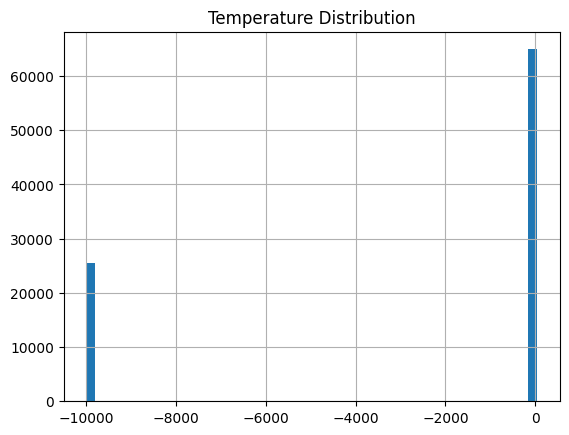

In [36]:
#temperature distribution
n = min(100000, df['temp_air_c'].shape[0])
df['temp_air_c'].dropna().sample(n).hist(bins=50)
plt.title('Temperature Distribution')
plt.show()


### Temperature vs Humidity (Scatter Plot)

To visualize the relationship between air temperature and relative humidity,  
a random sample of the dataset was used to handle the large data size efficiently.

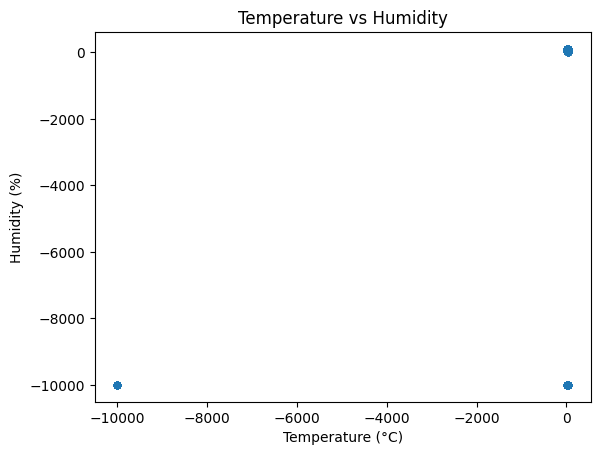

In [37]:
#temperature v/s humidity
n = min(100000, len(df))
df.sample(n).plot(
    x='temp_air_c',
    y='humidity_pct',
    kind='scatter',
    alpha=0.3
)

plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

### Distribution of Air Temperature

This histogram shows the distribution of air temperature values.
A random sample was used to efficiently visualize the large dataset.


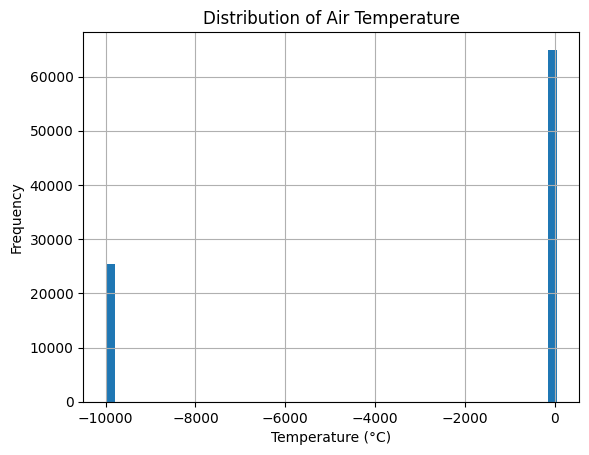

In [38]:
#distribution of air temp.
temp = df['temp_air_c'].dropna()
n = min(100000, len(temp))

temp.sample(n).hist(bins=50)
plt.title('Distribution of Air Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

### Distribution of Rainfall

This plot helps identify rainfall patterns and the presence of extreme values.


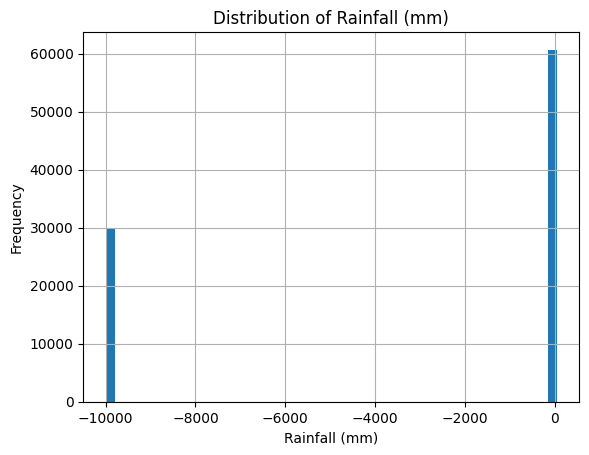

In [39]:
#distribution of rainfall
rain = df['precip_mm'].dropna()
n = min(100000, len(rain))

rain.sample(n).hist(bins=50)
plt.title('Distribution of Rainfall (mm)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()


### Wind Speed Distribution

This visualization highlights typical wind speed ranges and outliers.


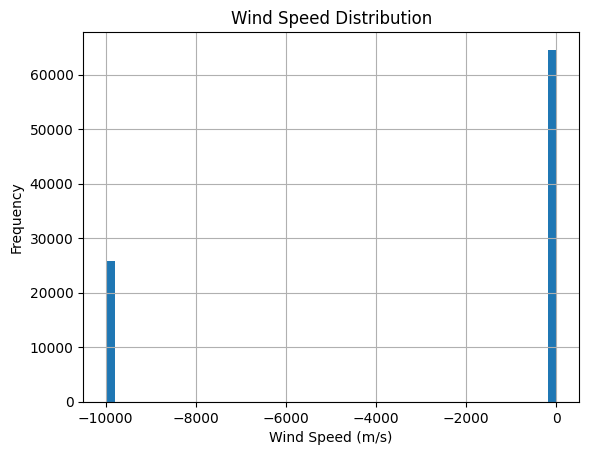

In [40]:
#distribution of windspeed
wind = df['wind_speed_ms'].dropna()
n = min(100000, len(wind))

wind.sample(n).hist(bins=50)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()


### Average Monthly Temperature Trend

This line chart shows seasonal temperature variations across months.


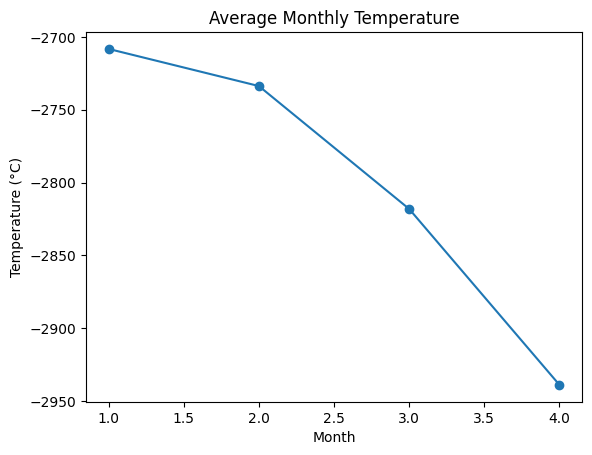

In [41]:
#monthly temp.
df['month'] = df['datetime'].dt.month

monthly_temp = df.groupby('month')['temp_air_c'].mean()

monthly_temp.plot(kind='line', marker='o')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()


### Hourly Temperature Pattern

This plot captures daily temperature variation across different hours.


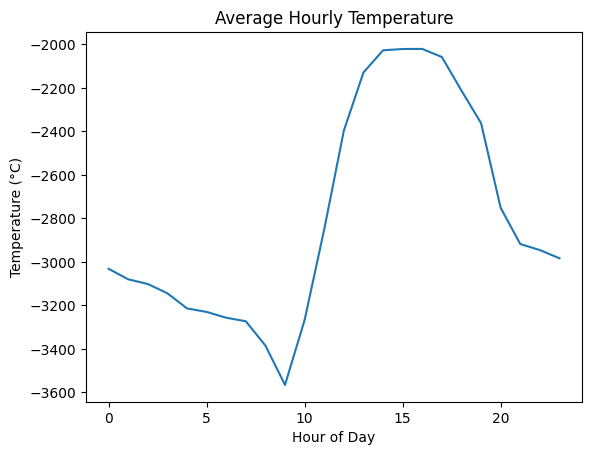

In [42]:
#hourly temp.
df['hour'] = df['datetime'].dt.hour

hourly_temp = df.groupby('hour')['temp_air_c'].mean()

hourly_temp.plot(kind='line')
plt.title('Average Hourly Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')
plt.show()


### Correlation Heatmap

This heatmap visualizes the correlation between key weather variables such as
temperature, humidity, rainfall, pressure, and wind speed.

To efficiently handle the large dataset, a random sample of observations was used
while preserving overall correlation patterns.


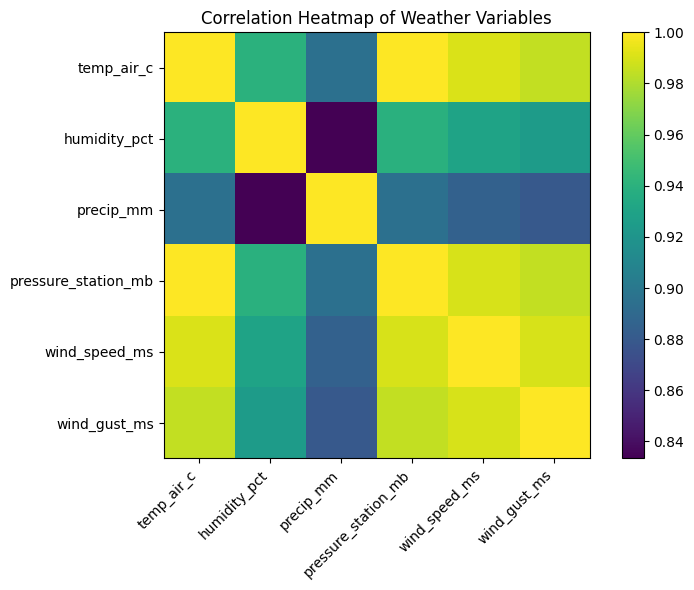

In [43]:
#corralation of columns
corr_cols = [
    'temp_air_c',
    'humidity_pct',
    'precip_mm',
    'pressure_station_mb',
    'wind_speed_ms',
    'wind_gust_ms'
]

corr_df = df[corr_cols].dropna().sample(
    n=min(100000, df[corr_cols].dropna().shape[0])
)

corr = corr_df.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr)
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title('Correlation Heatmap of Weather Variables')
plt.tight_layout()
plt.show()

### Total Monthly Rainfall

This bar chart highlights seasonal rainfall trends and identifies
months with heavy precipitation.


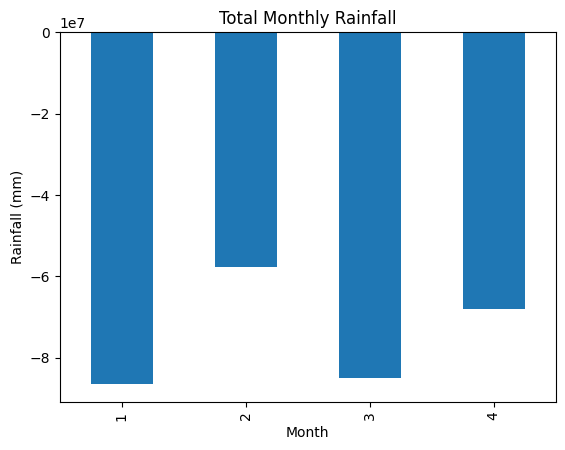

In [44]:
#monthly rainfall
monthly_rain = df.groupby('month')['precip_mm'].sum()

monthly_rain.plot(kind='bar')
plt.title('Total Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.show()

### Average Monthly Humidity

This visualization shows how relative humidity varies throughout the year,
reflecting seasonal moisture patterns.


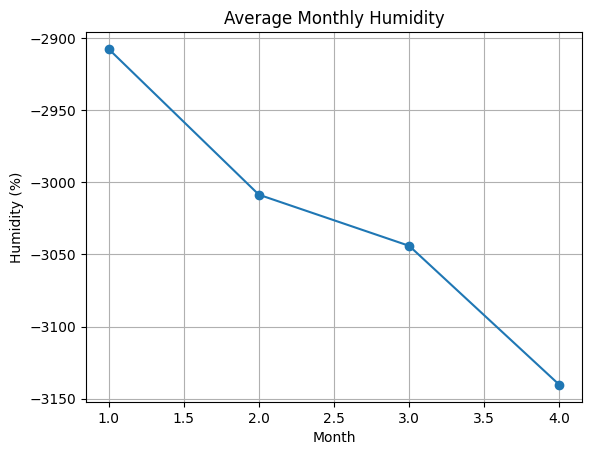

In [45]:
#monthly humidity
monthly_humidity = df.groupby('month')['humidity_pct'].mean()

monthly_humidity.plot(kind='line', marker='o')
plt.title('Average Monthly Humidity')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()


# SQL

In [46]:
import sqlite3
#create database
db = sqlite3.connect('weather.db')
chunksize = 100000


In [47]:
#create weather table

for chunk in pd.read_csv(
    'southeast_clean.csv',
    chunksize=chunksize,
    parse_dates=['datetime']
):
    chunk.to_sql(
        'weather',
        db,
        if_exists='append',
        index=False
    )


In [48]:
#table information
pd.read_sql("PRAGMA table_info(weather)", db)


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,date,TEXT,0,None,0
2,2,hour,REAL,0,None,0
3,3,precip_mm,REAL,0,None,0
4,4,pressure_station_mb,REAL,0,None,0
5,5,pressure_max_prev_mb,REAL,0,None,0
6,6,pressure_min_prev_mb,REAL,0,None,0
7,7,solar_radiation_kj,INTEGER,0,None,0
8,8,temp_air_c,REAL,0,None,0
9,9,dew_point_c,REAL,0,None,0


In [49]:
#total records
pd.read_sql("SELECT COUNT(*) FROM weather", db)



,COUNT(*)
0,90432


In [50]:
#date range
pd.read_sql("SELECT MIN(datetime) AS start_date,MAX(datetime) AS end_date FROM weather",db)


,start_date,end_date
0,2021-01-01 00:00:00,2021-04-30 23:00:00


In [51]:
#unique stations
pd.read_sql("SELECT COUNT(DISTINCT station) AS total_stations FROM weather",db)


,total_stations
0,17


In [52]:
#average temperature
pd.read_sql("SELECT ROUND(AVG(temp_air_c),2) AS avg_temp FROM weather",db)


,avg_temp
0,-2801.13


In [53]:
#total rainfall 
pd.read_sql("SELECT ROUND(SUM(precip_mm),2) AS total_rainfall FROM weather WHERE precip_mm > 0",db)


,total_rainfall
0,9999.6


In [54]:
#avg.humidity
pd.read_sql("SELECT ROUND(AVG(humidity_pct),2) AS avg_humidity FROM weather",db)


,avg_humidity
0,-3024.72


In [55]:
#max wind speed
pd.read_sql("SELECT MAX(wind_speed_ms) AS max_wind_speed FROM weather",db)


,max_wind_speed
0,10.8


In [56]:
#year wise avg. temp
pd.read_sql("SELECT strftime('%Y', datetime) AS year,ROUND(AVG(temp_air_c),2) AS avg_temp FROM weather GROUP BY year ORDER BY year ",db)


,year,avg_temp
0,2021,-2801.13


In [57]:
#month wise rain fall
pd.read_sql("SELECT strftime('%m', datetime) AS month,ROUND(SUM(precip_mm),2) AS total_rainfall FROM weather GROUP BY month ORDER BY month",db)


,month,total_rainfall
0,01,-86488981.6
1,02,-57749388.8
2,03,-85049521.2
3,04,-68052370.8


In [58]:
#hour wise temp.
pd.read_sql("SELECT strftime('%H', datetime) AS hour, ROUND(AVG(temp_air_c),2) AS avg_temp FROM weather GROUP BY hour ORDER BY hour",db)

,hour,avg_temp
0,00,-3031.78
1,01,-3080.00
2,02,-3101.56
3,03,-3144.35
4,04,-3213.70
5,05,-3229.88
6,06,-3256.67
7,07,-3272.80
8,08,-3384.62
9,09,-3565.39


In [59]:
#state wise avg temp
pd.read_sql("SELECT state,ROUND(AVG(temp_air_c),2) AS avg_temp FROM weather GROUP BY state ORDER BY avg_temp DESC",db)


,state,avg_temp
0,RJ,25.09
1,MG,-2168.14
2,SP,-4190.01


In [60]:
#top 5 hotest stations
pd.read_sql("SELECT station,ROUND(AVG(temp_air_c),2) AS avg_temp FROM weather GROUP BY station ORDER BY avg_temp DESC LIMIT 5",db)


,station,avg_temp
0,DUQUE DE CAXIAS - XEREM,25.09
1,MURIAE,24.63
2,RANCHARIA,23.76
3,FRANCA,22.44
4,VARGINHA,21.50
